In [3]:
!pip install explainerdashboard
!pip install optuna
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 61.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.2.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainerdashboard 0.4.2.1 requires scikit-learn>=1.1, but you have scikit-learn 0.23.2 which is incompatible.


In [5]:
!pip install -U jinja2==3.0.3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 7.6 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainerdashboard 0.4.2.1 requires scikit-learn>=1.1, but you have scikit-learn 0.23.2 which is incompatible.


In [1]:
# System
from time import time
import pandas as pd
# Data
pd.set_option('display.max_columns', None)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.contrib.missing import MissingValuesBar

%matplotlib inline

# Explainability
import shap

In [2]:
df=pd.read_csv("/content/Toddler Autism dataset July 2018.csv")

In [3]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [5]:
df = df.drop(columns=['Case_No','Qchat-10-Score','Who completed the test'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


In [6]:
df = df.rename(columns={'Class/ASD Traits ': 'label'})
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,label
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


In [7]:
unique_values = df['label'].unique()
unique_values

array(['No', 'Yes'], dtype=object)

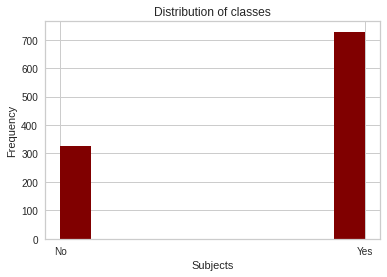

In [8]:
plt.hist(df["label"], color = "maroon")
plt.xlabel("Subjects")
plt.ylabel("Frequency")
plt.title("Distribution of classes");

In [9]:
df.shape

(1054, 16)

In [10]:
df.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons
A1,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508
A2,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744
A3,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880
A4,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873
A5,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448
A6,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907
A7,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442
A8,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505
A9,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650
A10,0.130966,0.157498,0.003848,0.016872,0.045347,0.072162,0.175114,0.082004,0.028710,1.000000,-0.013021


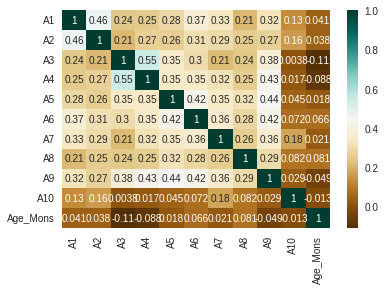

In [11]:
heatmap = sns.heatmap(df.corr(),annot=True,cmap='BrBG')

In [12]:
# Drop essential column that will be use for prediction.
X = df.drop(['label'],axis=1)
y = df['label']

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
data_train=pd.concat([X_train, y_train], axis=1)
data_train.shape

(843, 16)

In [16]:
data_test=pd.concat([X_test, y_test], axis=1)
data_test.shape

(211, 16)

In [17]:
data_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,label
357,1,1,0,1,1,1,1,0,1,0,14,m,asian,no,no,Yes
216,0,0,0,0,0,1,0,0,1,1,13,f,middle eastern,no,no,No
874,0,0,1,1,0,0,0,1,1,0,31,m,south asian,no,no,Yes
635,1,0,1,0,1,1,1,0,1,0,25,m,White European,no,yes,Yes
505,0,1,1,0,0,0,0,1,0,1,36,m,south asian,no,no,Yes


In [18]:
data_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,label
854,0,1,0,0,0,1,0,0,0,0,36,f,White European,yes,no,No
1022,0,0,0,0,0,0,0,0,0,0,36,f,White European,no,yes,No
105,1,1,1,1,1,1,1,1,1,0,25,m,middle eastern,no,no,Yes
868,1,1,1,1,0,0,1,1,0,1,36,f,mixed,yes,no,Yes
95,0,1,0,0,0,0,0,0,0,1,12,f,middle eastern,no,no,No


In [19]:
# create train - test datasets
print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions: ' + str(data_test.shape))

Data for Modeling: (843, 16)
Unseen Data For Predictions: (211, 16)


In [20]:
# import pandas_profiling

In [21]:
# report = pandas_profiling.ProfileReport(data_train)
# report

In [22]:
from pycaret.classification import *

In [23]:
experiment = setup(data=data_train, target='label', data_split_shuffle = True, data_split_stratify =True,
                    fold_shuffle=True, normalize=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,label
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(843, 16)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='label',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                                                  target='label')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 

In [24]:
all_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.067
lr,Logistic Regression,0.9966,1.0000,1.0000,0.9952,0.9976,0.9920,0.9922,0.630
svm,SVM - Linear Kernel,0.9966,0.0000,0.9976,0.9976,0.9976,0.9920,0.9922,0.010
xgboost,Extreme Gradient Boosting,0.9678,0.9976,0.9779,0.9762,0.9767,0.9243,0.9258,0.146
lightgbm,Light Gradient Boosting Machine,0.9678,0.9962,0.9804,0.9736,0.9768,0.9240,0.9248,0.161
gbc,Gradient Boosting Classifier,0.9610,0.9948,0.9754,0.9692,0.9719,0.9083,0.9105,0.076
rf,Random Forest Classifier,0.9508,0.9935,0.9780,0.9544,0.9653,0.8810,0.8859,0.152
lda,Linear Discriminant Analysis,0.9492,0.9876,0.9485,0.9774,0.9626,0.8834,0.8852,0.023
et,Extra Trees Classifier,0.9475,0.9923,0.9682,0.9574,0.9623,0.8758,0.8787,0.243
ridge,Ridge Classifier,0.9458,0.0000,0.9510,0.9701,0.9603,0.8748,0.8760,0.010


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)
INFO:logs:compare_models() succesfully completed......................................


In [25]:
et_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9492,0.9905,0.9512,0.9750,0.9630,0.8819,0.8826
1,0.9322,0.9871,0.9756,0.9302,0.9524,0.8350,0.8378
2,0.9831,1.0000,0.9756,1.0000,0.9877,0.9606,0.9614
3,0.9153,0.9831,0.9268,0.9500,0.9383,0.8032,0.8038
4,0.9492,0.9932,0.9756,0.9524,0.9639,0.8782,0.8789
5,0.9661,0.9912,0.9756,0.9756,0.9756,0.9201,0.9201
6,0.9322,0.9905,0.9268,0.9744,0.9500,0.8449,0.8475
7,0.9661,0.9961,0.9750,0.9750,0.9750,0.9224,0.9224
8,0.9153,0.9987,1.0000,0.8889,0.9412,0.7915,0.8093


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [27]:
LR_model = create_model('lr',return_train_score=True)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                       
CV-Train 0       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         1       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         2       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         3       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         4       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         5       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         6       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         7       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         8       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         9       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
CV-Val   0       0.9831  1.0     1.0  0.9762  0.9880  0.9594  0.9602
         1       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         2       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         3       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         4       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         5       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         6       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         7       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         8       0.9831  1.0     1.0  0.9756  0.9877  0.9606  0.9614
         9       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
CV-Train Mean    1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
         Std     0.0000  0.0     0.0  0.0000  0.0000  0.0000  0.0000
CV-Val   Mean    0.9966  1.0     1.0  0.9952  0.9976  0.9920  0.9922
         Std     0.0068  0.0     0.0  0.0096  0.0049  0.0160  0.0157
Train    NaN     1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [28]:
knn_model = create_model('knn',return_train_score=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                          
CV-Train 0       0.9623  0.9940  0.9617  0.9832  0.9724  0.9132  0.9138
         1       0.9642  0.9942  0.9617  0.9860  0.9737  0.9177  0.9184
         2       0.9718  0.9938  0.9672  0.9916  0.9793  0.9350  0.9357
         3       0.9642  0.9944  0.9617  0.9860  0.9737  0.9177  0.9184
         4       0.9699  0.9943  0.9672  0.9888  0.9779  0.9306  0.9311
         5       0.9605  0.9938  0.9563  0.9859  0.9709  0.9093  0.9104
         6       0.9661  0.9957  0.9617  0.9888  0.9751  0.9222  0.9230
         7       0.9680  0.9938  0.9646  0.9888  0.9766  0.9261  0.9268
         8       0.9605  0.9936  0.9537  0.9887  0.9709  0.9094  0.9108
         9       0.9586  0.9932  0.9537  0.9859  0.9695  0.9049  0.9061
CV-Val   0       0.9153  0.9770  0.9024  0.9737  0.9367  0.8091  0.8144
         1       0.8814  0.9404  0.8537  0.9722  0.9091  0.7404  0.7535
         2       0.9322  0.9892  0.9268  0.9744  0.9500  0.8449  0.8475
         3       0.9322  0.9919  0.9024  1.0000  0.9487  0.8495  0.8593
         4       0.9322  0.9898  0.9268  0.9744  0.9500  0.8449  0.8475
         5       0.9153  0.9864  0.9024  0.9737  0.9367  0.8091  0.8144
         6       0.9661  0.9973  0.9512  1.0000  0.9750  0.9225  0.9253
         7       0.9492  0.9724  0.9750  0.9512  0.9630  0.8819  0.8826
         8       0.9322  0.9632  0.9750  0.9286  0.9512  0.8403  0.8430
         9       0.9661  0.9967  0.9750  0.9750  0.9750  0.9224  0.9224
CV-Train Mean    0.9646  0.9941  0.9610  0.9874  0.9740  0.9186  0.9195
         Std     0.0041  0.0006  0.0047  0.0023  0.0030  0.0093  0.0092
CV-Val   Mean    0.9322  0.9804  0.9291  0.9723  0.9495  0.8465  0.8510
         Std     0.0240  0.0169  0.0383  0.0198  0.0186  0.0519  0.0489
Train    NaN     0.9661  0.9937  0.9631  0.9874  0.9751  0.9220  0.9227

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [29]:
rf_model = create_model('rf',return_train_score=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                          
CV-Train 0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
CV-Val   0       0.9492  0.9946  0.9512  0.9750  0.9630  0.8819  0.8826
         1       0.9153  0.9892  0.9756  0.9091  0.9412  0.7903  0.7967
         2       0.9831  1.0000  0.9756  1.0000  0.9877  0.9606  0.9614
         3       0.9661  0.9905  1.0000  0.9535  0.9762  0.9175  0.9206
         4       0.9492  0.9959  0.9756  0.9524  0.9639  0.8782  0.8789
         5       0.9492  0.9878  0.9756  0.9524  0.9639  0.8782  0.8789
         6       0.9492  0.9939  0.9512  0.9750  0.9630  0.8819  0.8826
         7       0.9831  0.9974  0.9750  1.0000  0.9873  0.9617  0.9624
         8       0.8814  0.9921  1.0000  0.8511  0.9195  0.6992  0.7332
         9       0.9831  0.9934  1.0000  0.9756  0.9877  0.9606  0.9614
CV-Train Mean    1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         Std     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
CV-Val   Mean    0.9508  0.9935  0.9780  0.9544  0.9653  0.8810  0.8859
         Std     0.0307  0.0036  0.0171  0.0427  0.0207  0.0786  0.0706
Train    NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [30]:
et_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [31]:
evaluate_model(et_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
evaluate_model(knn_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [33]:
evaluate_model(rf_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 9.1 - SHAP Summary Plot

Shows effects of each feature on model predictions based on SHAP values for the entire test dataset. 

Positive values have a positive influence on model (pushes it to predict the positive class) and negative values have a negative influence on the model (pushes it to predict the negative class)

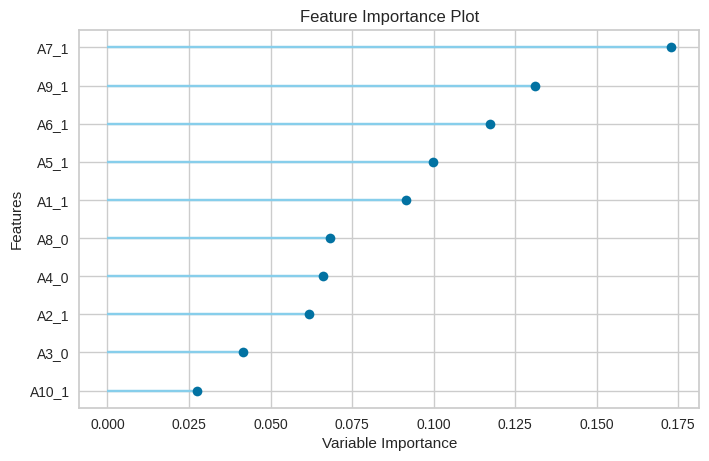

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(et_model, plot='feature')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


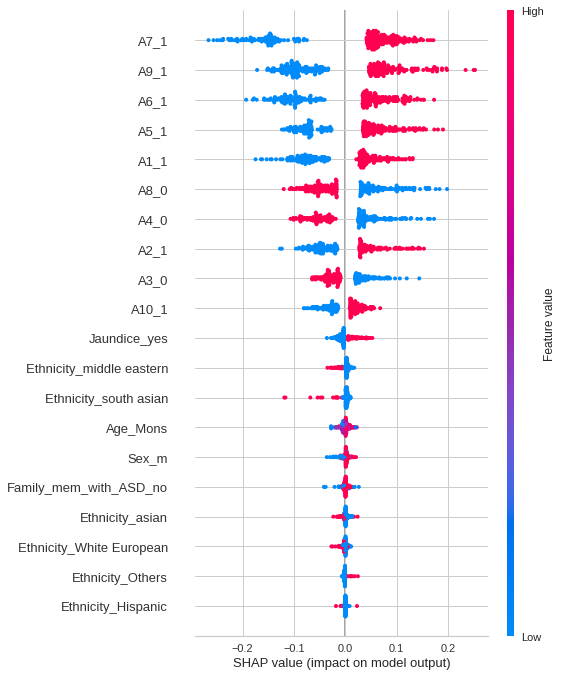

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [35]:
interpret_model(et_model, plot='summary')

## 9.4 - XAI Explainer Dashboard

This generates an interactive dashboard for a trained model consisting of evaluation metrics and SHAP based explanation artifacts

In [ ]:
# dashboard(Best_Model)

# 10) Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting on the test/hold-out set and reviewing the evaluation metrics. 

30% (260 samples) of the data has been separated out as test/hold-out sample. 

All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. The `plot_model` shows results on the Test Data.

We can use our trained model stored in the `Best_Model` variable to get predictions from our test data and use them as necessary

In [36]:
new_predictions1 = predict_model(knn_model, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9605,0.9893,0.9714,0.9714,0.9714,0.9073,0.9073


In [37]:
new_predictions2 = predict_model(et_model, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9526,0.994,0.9771,0.9553,0.9661,0.8872,0.8878


In [38]:
new_predictions4 = predict_model(rf_model, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9605,0.9953,0.9829,0.9609,0.9718,0.906,0.9066


# 11 - Finalize Model for Deployment

Model finalization is the last step in the experiment. 

A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. (more on advanced techniques in the next tutorial!).

This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. 


The `finalize_model()` function fits the model onto the complete dataset **including** the test/hold-out sample (30% in this case). The purpose of this function is to **train the model on the complete dataset** before it is deployed in production.

In [39]:
final_model1 = finalize_model(knn_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_ta

In [40]:
final_model2 = finalize_model(et_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min

In [41]:
final_model4 = finalize_model(rf_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impu

# 12 - Predict on unseen / new datasets

The `predict_model()` function is also used to predict on any new / unseen datasets. 

The only difference from section 11 above is that this time we will pass the `data_test` parameter. `data_test` is the variable created at the beginning of the tutorial and contains 15% of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [42]:
new_predictions1 = predict_model(final_model1, data=data_test, raw_score=True)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0,0.9948,0,0,0,0,0


In [43]:
new_predictions2 = predict_model(final_model2, data=data_test, raw_score=True)


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0,0.9939,0,0,0,0,0


In [44]:
new_predictions4 = predict_model(final_model4, data=data_test, raw_score=True)


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0,0.9946,0,0,0,0,0


In [45]:
new_predictions1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,label,Label,Score_No,Score_Yes
854,0,1,0,0,0,1,0,0,0,0,36,f,White European,yes,no,No,No,1.0,0.0
1022,0,0,0,0,0,0,0,0,0,0,36,f,White European,no,yes,No,No,1.0,0.0
105,1,1,1,1,1,1,1,1,1,0,25,m,middle eastern,no,no,Yes,Yes,0.0,1.0
868,1,1,1,1,0,0,1,1,0,1,36,f,mixed,yes,no,Yes,Yes,0.0,1.0
95,0,1,0,0,0,0,0,0,0,1,12,f,middle eastern,no,no,No,No,1.0,0.0


In [ ]:
# launch eda
!pip install autoviz
eda(display_format = 'bokeh')

In [ ]:
save_model(final_model,'knn_model')